In [28]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [29]:
class LinearReg(torch.nn.Module):
    def __init__(self, input, output):
        super(LinearReg, self).__init__()
        self.linear = torch.nn.Linear(input, output)
        nn.init.normal_(self.linear.weight, 0.0, 0.01)

    def forward(self, x):
        out = self.linear(x)
        return out
    
class Create_dataset(data.Dataset):
  def __init__(self, num_sample=1000):
    self.x = np.random.normal(0, 1, (num_sample, 2))
    y = np.dot(self.x, [2, -3.4]) + 4.2 + np.random.normal(0, 0.01, num_sample)
    self.y = y.reshape((-1, 1))
    
  def __len__(self):
    return len(self.x)

  def __getitem__(self, index):
    return self.x[index], self.y[index]

def square_loss(pred_y, true_y):
    return (pred_y - true_y.reshape(pred_y.shape))**2 / 2
    
model = LinearReg(2, 1)
dataset = Create_dataset()

In [30]:
optimizer = optim.SGD(model.parameters(), lr=0.001) 
criterion = nn.MSELoss()
num_epochs = 3000
losses = []
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=512, shuffle=True)

for i in range(num_epochs):
  epoch_loss= 0.0
  model.train()
  for input_x, true_y in train_dataloader:
    optimizer.zero_grad()
    with torch.set_grad_enabled(True):
      pred_y = model(input_x.float())
      loss = criterion(pred_y.float(), true_y.float())
      #epoch_loss = square_loss(pred_y.float(), true_y.float())
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item() * input_x.size(0)

  epoch_loss = epoch_loss / len(train_dataloader.dataset)
  losses.append(epoch_loss)
  
  if (i+1) % 100 == 0:
     print('EPOCH: {}, LOSS: {:.10f}'.format(
            i+1,
            epoch_loss,
        ))

EPOCH: 100, LOSS: 16.5822150574
EPOCH: 200, LOSS: 7.1480417366
EPOCH: 300, LOSS: 3.0825666199
EPOCH: 400, LOSS: 1.3301205034
EPOCH: 500, LOSS: 0.5741749926
EPOCH: 600, LOSS: 0.2480031027
EPOCH: 700, LOSS: 0.1072092032
EPOCH: 800, LOSS: 0.0463993888
EPOCH: 900, LOSS: 0.0201224112
EPOCH: 1000, LOSS: 0.0087627155
EPOCH: 1100, LOSS: 0.0038487131
EPOCH: 1200, LOSS: 0.0017221422
EPOCH: 1300, LOSS: 0.0008012518
EPOCH: 1400, LOSS: 0.0004021557
EPOCH: 1500, LOSS: 0.0002292471
EPOCH: 1600, LOSS: 0.0001540749
EPOCH: 1700, LOSS: 0.0001215144
EPOCH: 1800, LOSS: 0.0001073524
EPOCH: 1900, LOSS: 0.0001011772
EPOCH: 2000, LOSS: 0.0000984948
EPOCH: 2100, LOSS: 0.0000973251
EPOCH: 2200, LOSS: 0.0000968141
EPOCH: 2300, LOSS: 0.0000965923
EPOCH: 2400, LOSS: 0.0000964968
EPOCH: 2500, LOSS: 0.0000964535
EPOCH: 2600, LOSS: 0.0000964342
EPOCH: 2700, LOSS: 0.0000964265
EPOCH: 2800, LOSS: 0.0000964219
EPOCH: 2900, LOSS: 0.0000964218
EPOCH: 3000, LOSS: 0.0000964205


In [31]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 2.0005, -3.4007]], requires_grad=True)
Parameter containing:
tensor([4.2000], requires_grad=True)


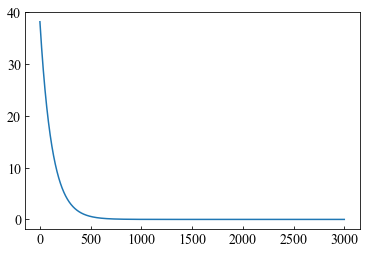

In [32]:
plt.plot(losses)

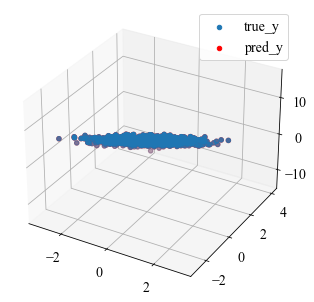

In [38]:
pred = model(torch.from_numpy(dataset.x).float()).detach().numpy()
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(dataset.x[:,0], dataset.x[:,1], dataset.y, label='true_y')

ax.scatter(dataset.x[:,0], dataset.x[:,1], pred, label='pred_y', color='red')


plt.legend()
plt.show()

[Parameter containing:
tensor([[0.0492, 0.0390]], requires_grad=True), Parameter containing:
tensor([0.0704], requires_grad=True)]
loss 13.753503799438477
[Parameter containing:
tensor([[0.0873, 0.0669]], requires_grad=True), Parameter containing:
tensor([0.1388], requires_grad=True)]
loss 13.030765533447266
[Parameter containing:
tensor([[0.1242, 0.0937]], requires_grad=True), Parameter containing:
tensor([0.2051], requires_grad=True)]
loss 12.351178169250488
[Parameter containing:
tensor([[0.1602, 0.1196]], requires_grad=True), Parameter containing:
tensor([0.2695], requires_grad=True)]
loss 11.712149620056152
[Parameter containing:
tensor([[0.1951, 0.1444]], requires_grad=True), Parameter containing:
tensor([0.3319], requires_grad=True)]
loss 11.111238479614258
[Parameter containing:
tensor([[0.2290, 0.1684]], requires_grad=True), Parameter containing:
tensor([0.3926], requires_grad=True)]
loss 10.546154975891113
[Parameter containing:
tensor([[0.2620, 0.1913]], requires_grad=True),

[Parameter containing:
tensor([[ 1.7437, -0.2792]], requires_grad=True), Parameter containing:
tensor([2.7106], requires_grad=True)]
loss 0.828374445438385
[Parameter containing:
tensor([[ 1.7452, -0.2837]], requires_grad=True), Parameter containing:
tensor([2.7122], requires_grad=True)]
loss 0.8259515762329102
[Parameter containing:
tensor([[ 1.7466, -0.2881]], requires_grad=True), Parameter containing:
tensor([2.7137], requires_grad=True)]
loss 0.8235362768173218
[Parameter containing:
tensor([[ 1.7481, -0.2925]], requires_grad=True), Parameter containing:
tensor([2.7153], requires_grad=True)]
loss 0.8211283683776855
[Parameter containing:
tensor([[ 1.7495, -0.2969]], requires_grad=True), Parameter containing:
tensor([2.7168], requires_grad=True)]
loss 0.8187279105186462
[Parameter containing:
tensor([[ 1.7510, -0.3013]], requires_grad=True), Parameter containing:
tensor([2.7184], requires_grad=True)]
loss 0.8163349628448486
[Parameter containing:
tensor([[ 1.7524, -0.3057]], require

[Parameter containing:
tensor([[ 2.0309, -1.2769]], requires_grad=True), Parameter containing:
tensor([3.0780], requires_grad=True)]
loss 0.37806811928749084
[Parameter containing:
tensor([[ 2.0316, -1.2799]], requires_grad=True), Parameter containing:
tensor([3.0792], requires_grad=True)]
loss 0.3770129978656769
[Parameter containing:
tensor([[ 2.0323, -1.2828]], requires_grad=True), Parameter containing:
tensor([3.0803], requires_grad=True)]
loss 0.375961035490036
[Parameter containing:
tensor([[ 2.0330, -1.2857]], requires_grad=True), Parameter containing:
tensor([3.0815], requires_grad=True)]
loss 0.3749121427536011
[Parameter containing:
tensor([[ 2.0337, -1.2887]], requires_grad=True), Parameter containing:
tensor([3.0826], requires_grad=True)]
loss 0.37386631965637207
[Parameter containing:
tensor([[ 2.0344, -1.2916]], requires_grad=True), Parameter containing:
tensor([3.0838], requires_grad=True)]
loss 0.37282368540763855
[Parameter containing:
tensor([[ 2.0351, -1.2945]], requ

[Parameter containing:
tensor([[ 2.1639, -1.9521]], requires_grad=True), Parameter containing:
tensor([3.3587], requires_grad=True)]
loss 0.17675088346004486
[Parameter containing:
tensor([[ 2.1642, -1.9541]], requires_grad=True), Parameter containing:
tensor([3.3596], requires_grad=True)]
loss 0.1762821078300476
[Parameter containing:
tensor([[ 2.1645, -1.9561]], requires_grad=True), Parameter containing:
tensor([3.3605], requires_grad=True)]
loss 0.1758146584033966
[Parameter containing:
tensor([[ 2.1648, -1.9580]], requires_grad=True), Parameter containing:
tensor([3.3613], requires_grad=True)]
loss 0.17534857988357544
[Parameter containing:
tensor([[ 2.1650, -1.9600]], requires_grad=True), Parameter containing:
tensor([3.3622], requires_grad=True)]
loss 0.17488381266593933
[Parameter containing:
tensor([[ 2.1653, -1.9619]], requires_grad=True), Parameter containing:
tensor([3.3631], requires_grad=True)]
loss 0.1744203120470047
[Parameter containing:
tensor([[ 2.1656, -1.9639]], req

[Parameter containing:
tensor([[ 2.2097, -2.4045]], requires_grad=True), Parameter containing:
tensor([3.5699], requires_grad=True)]
loss 0.08561865240335464
[Parameter containing:
tensor([[ 2.2098, -2.4058]], requires_grad=True), Parameter containing:
tensor([3.5705], requires_grad=True)]
loss 0.08540289849042892
[Parameter containing:
tensor([[ 2.2099, -2.4071]], requires_grad=True), Parameter containing:
tensor([3.5712], requires_grad=True)]
loss 0.08518771827220917
[Parameter containing:
tensor([[ 2.2099, -2.4084]], requires_grad=True), Parameter containing:
tensor([3.5718], requires_grad=True)]
loss 0.08497309684753418
[Parameter containing:
tensor([[ 2.2100, -2.4097]], requires_grad=True), Parameter containing:
tensor([3.5725], requires_grad=True)]
loss 0.08475906401872635
[Parameter containing:
tensor([[ 2.2101, -2.4110]], requires_grad=True), Parameter containing:
tensor([3.5731], requires_grad=True)]
loss 0.08454560488462448
[Parameter containing:
tensor([[ 2.2101, -2.4123]], 

[Parameter containing:
tensor([[ 2.2107, -2.7082]], requires_grad=True), Parameter containing:
tensor([3.7275], requires_grad=True)]
loss 0.04305746406316757
[Parameter containing:
tensor([[ 2.2106, -2.7091]], requires_grad=True), Parameter containing:
tensor([3.7280], requires_grad=True)]
loss 0.0429539680480957
[Parameter containing:
tensor([[ 2.2106, -2.7100]], requires_grad=True), Parameter containing:
tensor([3.7285], requires_grad=True)]
loss 0.042850740253925323
[Parameter containing:
tensor([[ 2.2106, -2.7109]], requires_grad=True), Parameter containing:
tensor([3.7290], requires_grad=True)]
loss 0.04274778068065643
[Parameter containing:
tensor([[ 2.2105, -2.7117]], requires_grad=True), Parameter containing:
tensor([3.7295], requires_grad=True)]
loss 0.04264507442712784
[Parameter containing:
tensor([[ 2.2105, -2.7126]], requires_grad=True), Parameter containing:
tensor([3.7300], requires_grad=True)]
loss 0.042542628943920135
[Parameter containing:
tensor([[ 2.2104, -2.7135]],

[Parameter containing:
tensor([[ 2.1913, -2.9125]], requires_grad=True), Parameter containing:
tensor([3.8443], requires_grad=True)]
loss 0.022521909326314926
[Parameter containing:
tensor([[ 2.1912, -2.9132]], requires_grad=True), Parameter containing:
tensor([3.8447], requires_grad=True)]
loss 0.02246996946632862
[Parameter containing:
tensor([[ 2.1911, -2.9138]], requires_grad=True), Parameter containing:
tensor([3.8450], requires_grad=True)]
loss 0.022418145090341568
[Parameter containing:
tensor([[ 2.1910, -2.9144]], requires_grad=True), Parameter containing:
tensor([3.8454], requires_grad=True)]
loss 0.02236645668745041
[Parameter containing:
tensor([[ 2.1909, -2.9150]], requires_grad=True), Parameter containing:
tensor([3.8458], requires_grad=True)]
loss 0.022314898669719696
[Parameter containing:
tensor([[ 2.1908, -2.9156]], requires_grad=True), Parameter containing:
tensor([3.8461], requires_grad=True)]
loss 0.022263450548052788
[Parameter containing:
tensor([[ 2.1907, -2.9162

[Parameter containing:
tensor([[ 2.1662, -3.0460]], requires_grad=True), Parameter containing:
tensor([3.9272], requires_grad=True)]
loss 0.012566706165671349
[Parameter containing:
tensor([[ 2.1661, -3.0465]], requires_grad=True), Parameter containing:
tensor([3.9275], requires_grad=True)]
loss 0.012538664974272251
[Parameter containing:
tensor([[ 2.1660, -3.0469]], requires_grad=True), Parameter containing:
tensor([3.9278], requires_grad=True)]
loss 0.01251070387661457
[Parameter containing:
tensor([[ 2.1658, -3.0473]], requires_grad=True), Parameter containing:
tensor([3.9281], requires_grad=True)]
loss 0.01248280331492424
[Parameter containing:
tensor([[ 2.1657, -3.0478]], requires_grad=True), Parameter containing:
tensor([3.9284], requires_grad=True)]
loss 0.012454972602427006
[Parameter containing:
tensor([[ 2.1656, -3.0482]], requires_grad=True), Parameter containing:
tensor([3.9286], requires_grad=True)]
loss 0.012427203357219696
[Parameter containing:
tensor([[ 2.1655, -3.0486

[Parameter containing:
tensor([[ 2.1395, -3.1426]], requires_grad=True), Parameter containing:
tensor([3.9917], requires_grad=True)]
loss 0.007078228984028101
[Parameter containing:
tensor([[ 2.1394, -3.1429]], requires_grad=True), Parameter containing:
tensor([3.9919], requires_grad=True)]
loss 0.007062909193336964
[Parameter containing:
tensor([[ 2.1393, -3.1432]], requires_grad=True), Parameter containing:
tensor([3.9921], requires_grad=True)]
loss 0.007047620601952076
[Parameter containing:
tensor([[ 2.1392, -3.1435]], requires_grad=True), Parameter containing:
tensor([3.9924], requires_grad=True)]
loss 0.0070323701947927475
[Parameter containing:
tensor([[ 2.1391, -3.1438]], requires_grad=True), Parameter containing:
tensor([3.9926], requires_grad=True)]
loss 0.007017157506197691
[Parameter containing:
tensor([[ 2.1390, -3.1441]], requires_grad=True), Parameter containing:
tensor([3.9928], requires_grad=True)]
loss 0.007001974154263735
[Parameter containing:
tensor([[ 2.1389, -3.1

[Parameter containing:
tensor([[ 2.1147, -3.2114]], requires_grad=True), Parameter containing:
tensor([4.0408], requires_grad=True)]
loss 0.004061885643750429
[Parameter containing:
tensor([[ 2.1146, -3.2117]], requires_grad=True), Parameter containing:
tensor([4.0410], requires_grad=True)]
loss 0.004053340759128332
[Parameter containing:
tensor([[ 2.1145, -3.2119]], requires_grad=True), Parameter containing:
tensor([4.0412], requires_grad=True)]
loss 0.004044820088893175
[Parameter containing:
tensor([[ 2.1144, -3.2121]], requires_grad=True), Parameter containing:
tensor([4.0413], requires_grad=True)]
loss 0.004036315716803074
[Parameter containing:
tensor([[ 2.1143, -3.2123]], requires_grad=True), Parameter containing:
tensor([4.0415], requires_grad=True)]
loss 0.004027825314551592
[Parameter containing:
tensor([[ 2.1142, -3.2125]], requires_grad=True), Parameter containing:
tensor([4.0416], requires_grad=True)]
loss 0.00401935912668705
[Parameter containing:
tensor([[ 2.1141, -3.212

[Parameter containing:
tensor([[ 2.0923, -3.2621]], requires_grad=True), Parameter containing:
tensor([4.0791], requires_grad=True)]
loss 0.0023403409868478775
[Parameter containing:
tensor([[ 2.0922, -3.2623]], requires_grad=True), Parameter containing:
tensor([4.0793], requires_grad=True)]
loss 0.002335574245080352
[Parameter containing:
tensor([[ 2.0922, -3.2624]], requires_grad=True), Parameter containing:
tensor([4.0794], requires_grad=True)]
loss 0.0023308228701353073
[Parameter containing:
tensor([[ 2.0921, -3.2626]], requires_grad=True), Parameter containing:
tensor([4.0795], requires_grad=True)]
loss 0.002326080109924078
[Parameter containing:
tensor([[ 2.0920, -3.2628]], requires_grad=True), Parameter containing:
tensor([4.0796], requires_grad=True)]
loss 0.0023213454987853765
[Parameter containing:
tensor([[ 2.0919, -3.2629]], requires_grad=True), Parameter containing:
tensor([4.0798], requires_grad=True)]
loss 0.0023166160099208355
[Parameter containing:
tensor([[ 2.0919, -

[Parameter containing:
tensor([[ 2.0732, -3.2991]], requires_grad=True), Parameter containing:
tensor([4.1086], requires_grad=True)]
loss 0.0013671087799593806
[Parameter containing:
tensor([[ 2.0732, -3.2992]], requires_grad=True), Parameter containing:
tensor([4.1087], requires_grad=True)]
loss 0.0013644404243677855
[Parameter containing:
tensor([[ 2.0731, -3.2993]], requires_grad=True), Parameter containing:
tensor([4.1088], requires_grad=True)]
loss 0.0013617781223729253
[Parameter containing:
tensor([[ 2.0730, -3.2994]], requires_grad=True), Parameter containing:
tensor([4.1089], requires_grad=True)]
loss 0.0013591177994385362
[Parameter containing:
tensor([[ 2.0730, -3.2995]], requires_grad=True), Parameter containing:
tensor([4.1089], requires_grad=True)]
loss 0.0013564630644395947
[Parameter containing:
tensor([[ 2.0729, -3.2997]], requires_grad=True), Parameter containing:
tensor([4.1090], requires_grad=True)]
loss 0.0013538174098357558
[Parameter containing:
tensor([[ 2.0728,

tensor([4.1311], requires_grad=True)]
loss 0.0008154393290169537
[Parameter containing:
tensor([[ 2.0573, -3.3262]], requires_grad=True), Parameter containing:
tensor([4.1312], requires_grad=True)]
loss 0.0008139449637383223
[Parameter containing:
tensor([[ 2.0573, -3.3263]], requires_grad=True), Parameter containing:
tensor([4.1312], requires_grad=True)]
loss 0.0008124517626129091
[Parameter containing:
tensor([[ 2.0572, -3.3263]], requires_grad=True), Parameter containing:
tensor([4.1313], requires_grad=True)]
loss 0.0008109605987556279
[Parameter containing:
tensor([[ 2.0572, -3.3264]], requires_grad=True), Parameter containing:
tensor([4.1314], requires_grad=True)]
loss 0.0008094727527350187
[Parameter containing:
tensor([[ 2.0571, -3.3265]], requires_grad=True), Parameter containing:
tensor([4.1314], requires_grad=True)]
loss 0.0008079865365289152
[Parameter containing:
tensor([[ 2.0571, -3.3266]], requires_grad=True), Parameter containing:
tensor([4.1315], requires_grad=True)]
lo

[Parameter containing:
tensor([[ 2.0451, -3.3451]], requires_grad=True), Parameter containing:
tensor([4.1475], requires_grad=True)]
loss 0.0005137281259521842
[Parameter containing:
tensor([[ 2.0450, -3.3452]], requires_grad=True), Parameter containing:
tensor([4.1476], requires_grad=True)]
loss 0.000512865197379142
[Parameter containing:
tensor([[ 2.0450, -3.3452]], requires_grad=True), Parameter containing:
tensor([4.1477], requires_grad=True)]
loss 0.0005120047135278583
[Parameter containing:
tensor([[ 2.0449, -3.3453]], requires_grad=True), Parameter containing:
tensor([4.1477], requires_grad=True)]
loss 0.0005111449863761663
[Parameter containing:
tensor([[ 2.0449, -3.3453]], requires_grad=True), Parameter containing:
tensor([4.1478], requires_grad=True)]
loss 0.0005102860741317272
[Parameter containing:
tensor([[ 2.0449, -3.3454]], requires_grad=True), Parameter containing:
tensor([4.1478], requires_grad=True)]
loss 0.0005094325169920921
[Parameter containing:
tensor([[ 2.0448, 

[Parameter containing:
tensor([[ 2.0352, -3.3591]], requires_grad=True), Parameter containing:
tensor([4.1601], requires_grad=True)]
loss 0.0003396287211216986
[Parameter containing:
tensor([[ 2.0352, -3.3592]], requires_grad=True), Parameter containing:
tensor([4.1602], requires_grad=True)]
loss 0.00033912897924892604
[Parameter containing:
tensor([[ 2.0351, -3.3592]], requires_grad=True), Parameter containing:
tensor([4.1602], requires_grad=True)]
loss 0.00033863092539831996
[Parameter containing:
tensor([[ 2.0351, -3.3593]], requires_grad=True), Parameter containing:
tensor([4.1602], requires_grad=True)]
loss 0.00033813423942774534
[Parameter containing:
tensor([[ 2.0351, -3.3593]], requires_grad=True), Parameter containing:
tensor([4.1603], requires_grad=True)]
loss 0.0003376401145942509
[Parameter containing:
tensor([[ 2.0350, -3.3594]], requires_grad=True), Parameter containing:
tensor([4.1603], requires_grad=True)]
loss 0.00033714657183736563
[Parameter containing:
tensor([[ 2.0

[Parameter containing:
tensor([[ 2.0274, -3.3695]], requires_grad=True), Parameter containing:
tensor([4.1697], requires_grad=True)]
loss 0.0002391429152339697
[Parameter containing:
tensor([[ 2.0274, -3.3696]], requires_grad=True), Parameter containing:
tensor([4.1697], requires_grad=True)]
loss 0.00023885305563453585
[Parameter containing:
tensor([[ 2.0274, -3.3696]], requires_grad=True), Parameter containing:
tensor([4.1698], requires_grad=True)]
loss 0.00023856357438489795
[Parameter containing:
tensor([[ 2.0273, -3.3696]], requires_grad=True), Parameter containing:
tensor([4.1698], requires_grad=True)]
loss 0.00023827547556720674
[Parameter containing:
tensor([[ 2.0273, -3.3697]], requires_grad=True), Parameter containing:
tensor([4.1698], requires_grad=True)]
loss 0.0002379873621976003
[Parameter containing:
tensor([[ 2.0273, -3.3697]], requires_grad=True), Parameter containing:
tensor([4.1698], requires_grad=True)]
loss 0.0002376995689701289
[Parameter containing:
tensor([[ 2.02

[Parameter containing:
tensor([[ 2.0211, -3.3775]], requires_grad=True), Parameter containing:
tensor([4.1772], requires_grad=True)]
loss 0.0001790596725186333
[Parameter containing:
tensor([[ 2.0210, -3.3776]], requires_grad=True), Parameter containing:
tensor([4.1773], requires_grad=True)]
loss 0.00017889429000206292
[Parameter containing:
tensor([[ 2.0210, -3.3776]], requires_grad=True), Parameter containing:
tensor([4.1773], requires_grad=True)]
loss 0.00017872964963316917
[Parameter containing:
tensor([[ 2.0210, -3.3776]], requires_grad=True), Parameter containing:
tensor([4.1773], requires_grad=True)]
loss 0.0001785648928489536
[Parameter containing:
tensor([[ 2.0210, -3.3776]], requires_grad=True), Parameter containing:
tensor([4.1773], requires_grad=True)]
loss 0.00017840051441453397
[Parameter containing:
tensor([[ 2.0210, -3.3777]], requires_grad=True), Parameter containing:
tensor([4.1774], requires_grad=True)]
loss 0.00017823727102950215
[Parameter containing:
tensor([[ 2.0

[Parameter containing:
tensor([[ 2.0162, -3.3834]], requires_grad=True), Parameter containing:
tensor([4.1829], requires_grad=True)]
loss 0.0001449814735678956
[Parameter containing:
tensor([[ 2.0162, -3.3834]], requires_grad=True), Parameter containing:
tensor([4.1829], requires_grad=True)]
loss 0.00014488733722828329
[Parameter containing:
tensor([[ 2.0161, -3.3835]], requires_grad=True), Parameter containing:
tensor([4.1830], requires_grad=True)]
loss 0.00014479344827122986
[Parameter containing:
tensor([[ 2.0161, -3.3835]], requires_grad=True), Parameter containing:
tensor([4.1830], requires_grad=True)]
loss 0.00014469929737970233
[Parameter containing:
tensor([[ 2.0161, -3.3835]], requires_grad=True), Parameter containing:
tensor([4.1830], requires_grad=True)]
loss 0.00014460558304563165
[Parameter containing:
tensor([[ 2.0161, -3.3835]], requires_grad=True), Parameter containing:
tensor([4.1830], requires_grad=True)]
loss 0.0001445116358809173
[Parameter containing:
tensor([[ 2.0

[Parameter containing:
tensor([[ 2.0123, -3.3879]], requires_grad=True), Parameter containing:
tensor([4.1873], requires_grad=True)]
loss 0.000125125065096654
[Parameter containing:
tensor([[ 2.0123, -3.3879]], requires_grad=True), Parameter containing:
tensor([4.1873], requires_grad=True)]
loss 0.00012507158680818975
[Parameter containing:
tensor([[ 2.0123, -3.3879]], requires_grad=True), Parameter containing:
tensor([4.1873], requires_grad=True)]
loss 0.00012501826859079301
[Parameter containing:
tensor([[ 2.0123, -3.3879]], requires_grad=True), Parameter containing:
tensor([4.1873], requires_grad=True)]
loss 0.0001249650667887181
[Parameter containing:
tensor([[ 2.0123, -3.3880]], requires_grad=True), Parameter containing:
tensor([4.1874], requires_grad=True)]
loss 0.0001249120687134564
[Parameter containing:
tensor([[ 2.0123, -3.3880]], requires_grad=True), Parameter containing:
tensor([4.1874], requires_grad=True)]
loss 0.00012485873594414443
[Parameter containing:
tensor([[ 2.012

[Parameter containing:
tensor([[ 2.0094, -3.3911]], requires_grad=True), Parameter containing:
tensor([4.1905], requires_grad=True)]
loss 0.00011414875189075246
[Parameter containing:
tensor([[ 2.0094, -3.3911]], requires_grad=True), Parameter containing:
tensor([4.1905], requires_grad=True)]
loss 0.00011411781451897696
[Parameter containing:
tensor([[ 2.0094, -3.3911]], requires_grad=True), Parameter containing:
tensor([4.1905], requires_grad=True)]
loss 0.00011408687714720145
[Parameter containing:
tensor([[ 2.0094, -3.3912]], requires_grad=True), Parameter containing:
tensor([4.1905], requires_grad=True)]
loss 0.00011405579425627366
[Parameter containing:
tensor([[ 2.0094, -3.3912]], requires_grad=True), Parameter containing:
tensor([4.1906], requires_grad=True)]
loss 0.00011402517702663317
[Parameter containing:
tensor([[ 2.0094, -3.3912]], requires_grad=True), Parameter containing:
tensor([4.1906], requires_grad=True)]
loss 0.00011399445793358609
[Parameter containing:
tensor([[ 2

[Parameter containing:
tensor([[ 2.0072, -3.3935]], requires_grad=True), Parameter containing:
tensor([4.1930], requires_grad=True)]
loss 0.00010780795128084719
[Parameter containing:
tensor([[ 2.0072, -3.3936]], requires_grad=True), Parameter containing:
tensor([4.1930], requires_grad=True)]
loss 0.0001077898996300064
[Parameter containing:
tensor([[ 2.0072, -3.3936]], requires_grad=True), Parameter containing:
tensor([4.1930], requires_grad=True)]
loss 0.00010777227726066485
[Parameter containing:
tensor([[ 2.0072, -3.3936]], requires_grad=True), Parameter containing:
tensor([4.1930], requires_grad=True)]
loss 0.0001077542983694002
[Parameter containing:
tensor([[ 2.0072, -3.3936]], requires_grad=True), Parameter containing:
tensor([4.1930], requires_grad=True)]
loss 0.00010773626127047464
[Parameter containing:
tensor([[ 2.0072, -3.3936]], requires_grad=True), Parameter containing:
tensor([4.1930], requires_grad=True)]
loss 0.00010771872621262446
[Parameter containing:
tensor([[ 2.0

[Parameter containing:
tensor([[ 2.0055, -3.3954]], requires_grad=True), Parameter containing:
tensor([4.1948], requires_grad=True)]
loss 0.00010413329437142238
[Parameter containing:
tensor([[ 2.0055, -3.3954]], requires_grad=True), Parameter containing:
tensor([4.1948], requires_grad=True)]
loss 0.00010412302799522877
[Parameter containing:
tensor([[ 2.0055, -3.3954]], requires_grad=True), Parameter containing:
tensor([4.1948], requires_grad=True)]
loss 0.00010411255789222196
[Parameter containing:
tensor([[ 2.0055, -3.3954]], requires_grad=True), Parameter containing:
tensor([4.1948], requires_grad=True)]
loss 0.00010410222603240982
[Parameter containing:
tensor([[ 2.0055, -3.3954]], requires_grad=True), Parameter containing:
tensor([4.1948], requires_grad=True)]
loss 0.00010409188689664006
[Parameter containing:
tensor([[ 2.0055, -3.3954]], requires_grad=True), Parameter containing:
tensor([4.1948], requires_grad=True)]
loss 0.00010408156958874315
[Parameter containing:
tensor([[ 2

[Parameter containing:
tensor([[ 2.0042, -3.3968]], requires_grad=True), Parameter containing:
tensor([4.1963], requires_grad=True)]
loss 0.00010195341019425541
[Parameter containing:
tensor([[ 2.0042, -3.3968]], requires_grad=True), Parameter containing:
tensor([4.1963], requires_grad=True)]
loss 0.0001019473493215628
[Parameter containing:
tensor([[ 2.0042, -3.3968]], requires_grad=True), Parameter containing:
tensor([4.1963], requires_grad=True)]
loss 0.00010194136848440394
[Parameter containing:
tensor([[ 2.0042, -3.3968]], requires_grad=True), Parameter containing:
tensor([4.1963], requires_grad=True)]
loss 0.00010193528578383848
[Parameter containing:
tensor([[ 2.0042, -3.3968]], requires_grad=True), Parameter containing:
tensor([4.1963], requires_grad=True)]
loss 0.00010192962508881465
[Parameter containing:
tensor([[ 2.0042, -3.3968]], requires_grad=True), Parameter containing:
tensor([4.1963], requires_grad=True)]
loss 0.0001019238043227233
[Parameter containing:
tensor([[ 2.0

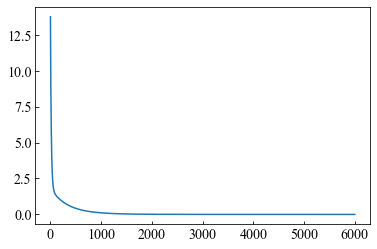

In [39]:
#若松さんのを確認
import torch
import numpy as np
import random
from matplotlib import pyplot as plt
 
def make_dataset(N=1000, w=np.array([2, -3.4]), b=4.2):
    noise = np.random.normal(
        loc = 0,
        scale = 0.01,
        size = N
    )
    w = np.transpose(w)
    X = np.empty((N, 2))
    Y = np.empty((N, 1))
    for i in range(N):
        x = np.random.rand(2)
        y = np.dot(x,w) + b + noise[i]
        X[i,0] = x[0]
        X[i,1] = x[1]
        Y[i] = y
    
    return X, Y

X, y = make_dataset()


def linear_regression(dimension, iteration, lr, x, y):
    net = torch.nn.Linear(in_features=dimension, out_features=1)  # ネットワークに線形結合モデルを設定
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)                      # 最適化にSGDを設定
    E = torch.nn.MSELoss()                                         # 損失関数にMSEを設定
    #w = np.random.normal(loc = 0, scale = 0.01, size = 2)
    #w = torch.from_numpy(w).float()
    #w = random.normalvariate(0, 0.01)
    net.weight.data.fill_(0.01)
    net.bias.data.fill_(0)
 

    # 学習ループ
    losses = []
    for i in range(iteration):
        optimizer.zero_grad()                                                 # 勾配情報を0に初期化
        y_pred = net(x)                                                       # 予測
        loss = E(y_pred.reshape(y.shape), y)                                  # 損失を計算(shapeを揃える)
        loss.backward()                                                       # 勾配の計算
        optimizer.step()                                                      # 勾配の更新
        losses.append(loss.item())                                            # 損失値の蓄積
        print(list(net.parameters()))
        print('loss', loss.item())
 
    # 回帰係数を取得して回帰直線を作成
    w0 = net.weight.data.numpy()[0, 0]
    w1 = net.weight.data.numpy()[0, 1]
    x_new = np.linspace(np.min(x.T[1].data.numpy()), np.max(x.T[1].data.numpy()), len(x))
    y_curve = w0 + w1 * x_new
 
    # グラフ描画
    plot(x.T[1], y, x_new, y_curve, losses)
    return net, losses
 
def plot(x, y, x_new, y_pred, losses):
    plt.plot(losses)
 
# サンプルデータ
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

# 線形回帰を実行
net, losses = linear_regression(dimension=2, iteration=6000, lr=0.01, x=X, y=y)